# Importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Analysing Data

In [6]:
df=pd.read_csv('/content/gdrive/MyDrive/Training/A_Z Handwritten Data.csv')

In [7]:
df.shape

(372450, 785)

In [8]:
data_array = np.array(df,dtype=np.uint8)
del df  #memory issues

In [9]:
data_array.shape

(372450, 785)

In [10]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [11]:
labels = data_array[:,0]
x = data_array[:,1:].reshape(372450,28,28)/255.
del data_array
unique, counts = np.unique(labels, return_counts=True)
list_alpha = list(zip(alpha, counts))
for i in list_alpha:
    print(i[0],' : ',i[1])

A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


<BarContainer object of 26 artists>

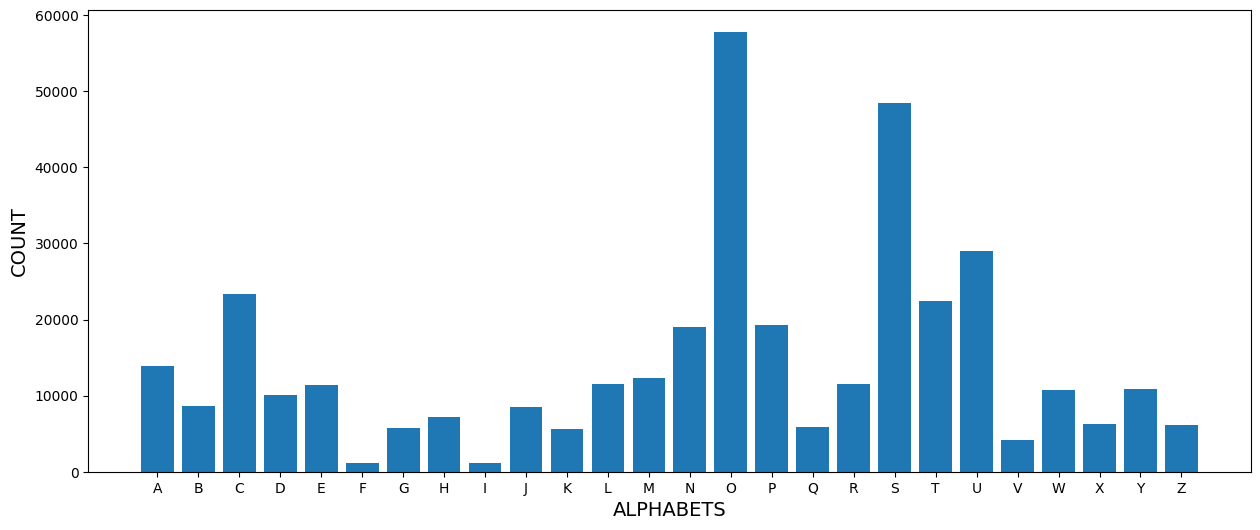

In [12]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('ALPHABETS',fontsize=14)
plt.ylabel('COUNT',fontsize=14)
plt.bar(alpha,counts)

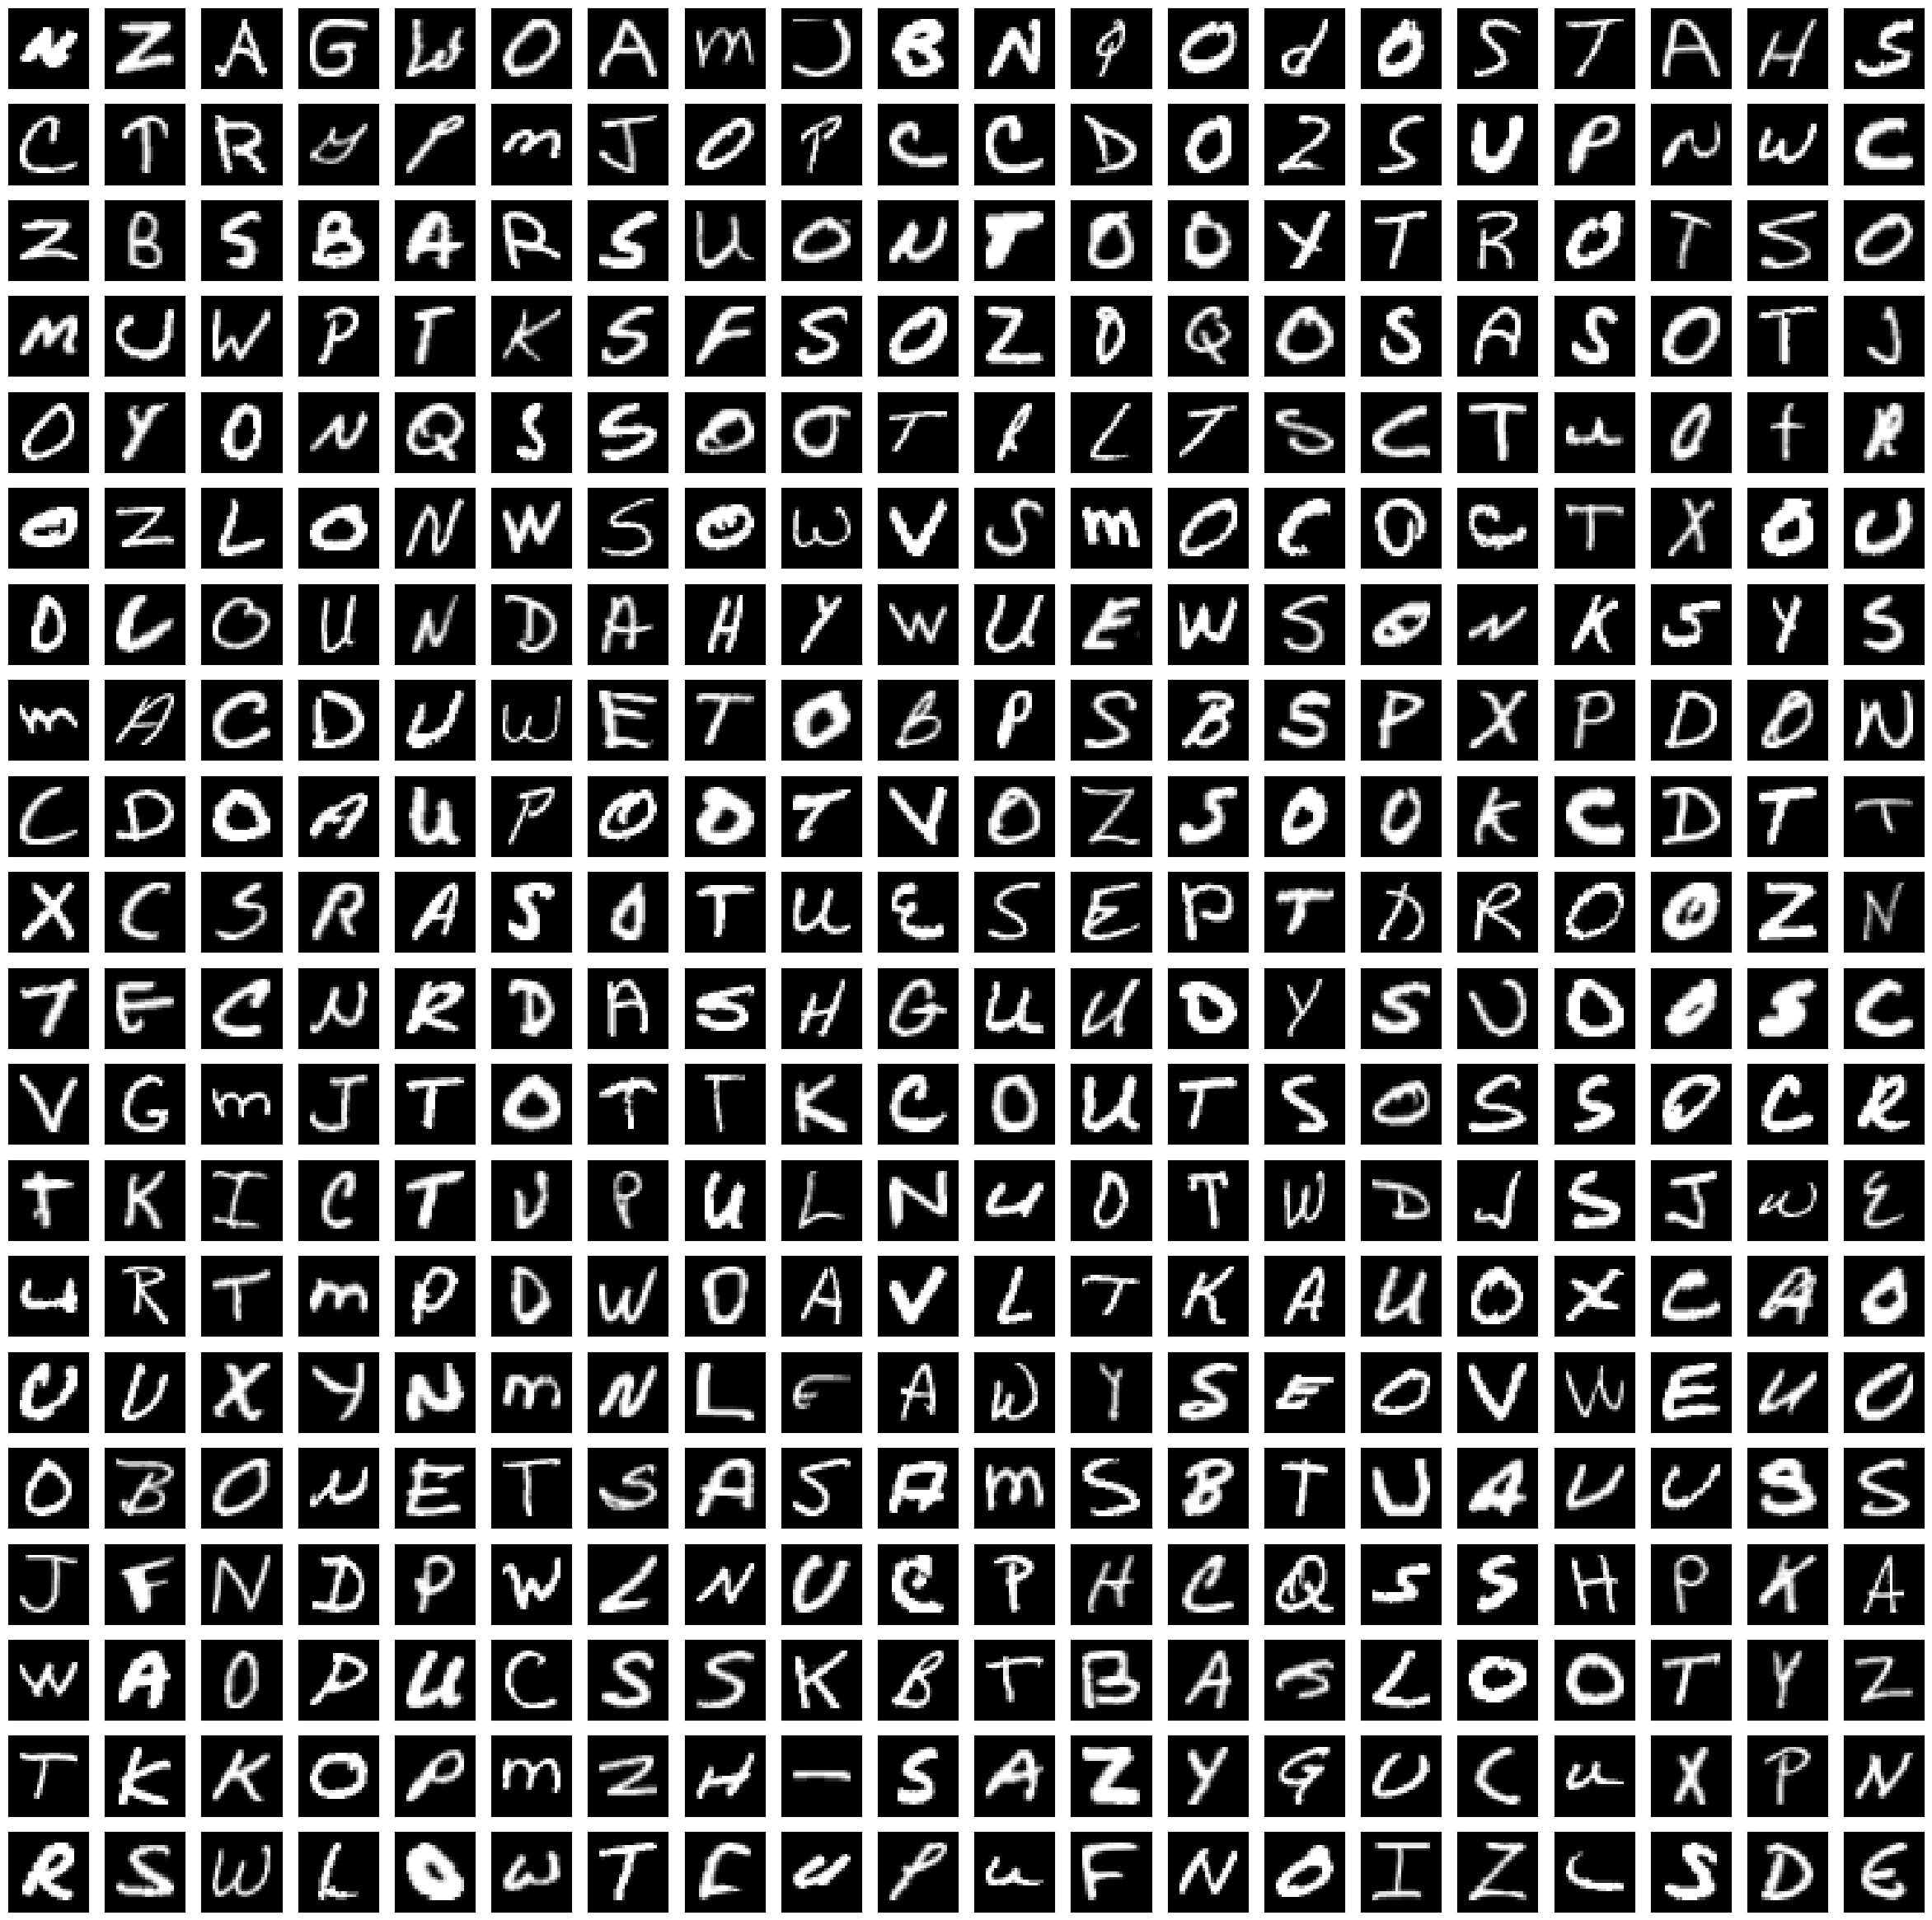

In [13]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x[i],cmap='gray')
    c+=1
del a

In [14]:
del c, list_alpha, counts, unique

# Training and Testing Split

In [15]:
from sklearn.model_selection import train_test_split as tts

In [16]:
x=x.reshape(372450,28,28,1)
x_train,x_test,y_train,y_test = tts(x,labels,test_size=0.2, shuffle=True)
del x  # memory issues
del labels
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(297960, 28, 28, 1)
(74490, 28, 28, 1)
(297960,)
(74490,)


# Model Building

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.optimizers import Adadelta
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    # Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    # Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

In [ ]:
history = model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=5)

Epoch 1/5
8381/8381 [==============================] - 528s 63ms/step - loss: 0.1530 - accuracy: 0.9571 - val_loss: 0.0596 - val_accuracy: 0.9838
Epoch 2/5
8381/8381 [==============================] - 536s 64ms/step - loss: 0.0742 - accuracy: 0.9790 - val_loss: 0.0517 - val_accuracy: 0.9866
Epoch 3/5
8381/8381 [==============================] - 530s 63ms/step - loss: 0.0585 - accuracy: 0.9832 - val_loss: 0.0411 - val_accuracy: 0.9894
Epoch 4/5
8381/8381 [==============================] - 537s 64ms/step - loss: 0.0503 - accuracy: 0.9854 - val_loss: 0.0396 - val_accuracy: 0.9896
Epoch 5/5
8381/8381 [==============================] - 528s 63ms/step - loss: 0.0444 - accuracy: 0.9869 - val_loss: 0.0372 - val_accuracy: 0.9897


In [ ]:
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
accuracy=history.history['accuracy']

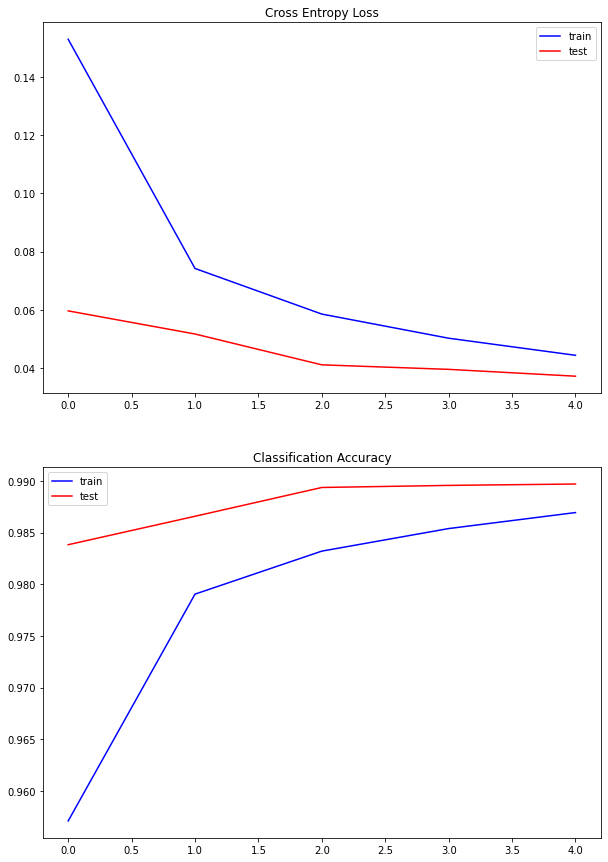

In [ ]:
fig=plt.figure(figsize=(10,15))
fig.add_subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(loss, color='blue', label='train')
plt.plot(val_loss, color='red', label='test')
plt.legend()
# plot accuracy
fig.add_subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(accuracy, color='blue', label='train')
plt.plot(val_accuracy, color='red', label='test')
plt.legend()

In [ ]:
metrics=model.evaluate(x_test,y_test)
metrics
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

2328/2328 [==============================] - 43s 18ms/step - loss: 0.0373 - accuracy: 0.9897
Test Acuracy is : 98.97
Test Loss is : 0.04


In [ ]:
model.save('best_model1.h5')

/opt/homebrew/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model=tf.keras.models.load_model('/content/gdrive/MyDrive/Training/best_model1.h5')

In [20]:
metrics= model.evaluate(x_test,y_test)
print(metrics)
print("Test Acuracy is : {:.2f}".format(metrics[1]*100))
print("Test Loss is : {:.2f}".format(metrics[0]))

2328/2328 [==============================] - 302s 129ms/step - loss: 0.0263 - accuracy: 0.9926
[0.0262958612293005, 0.9925895929336548]
Test Acuracy is : 99.26
Test Loss is : 0.03


# Evaluating On Test Dataset

In [21]:
def test_images(n=50):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=model.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alpha[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alpha[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 [==============================] - 0s 39ms/step


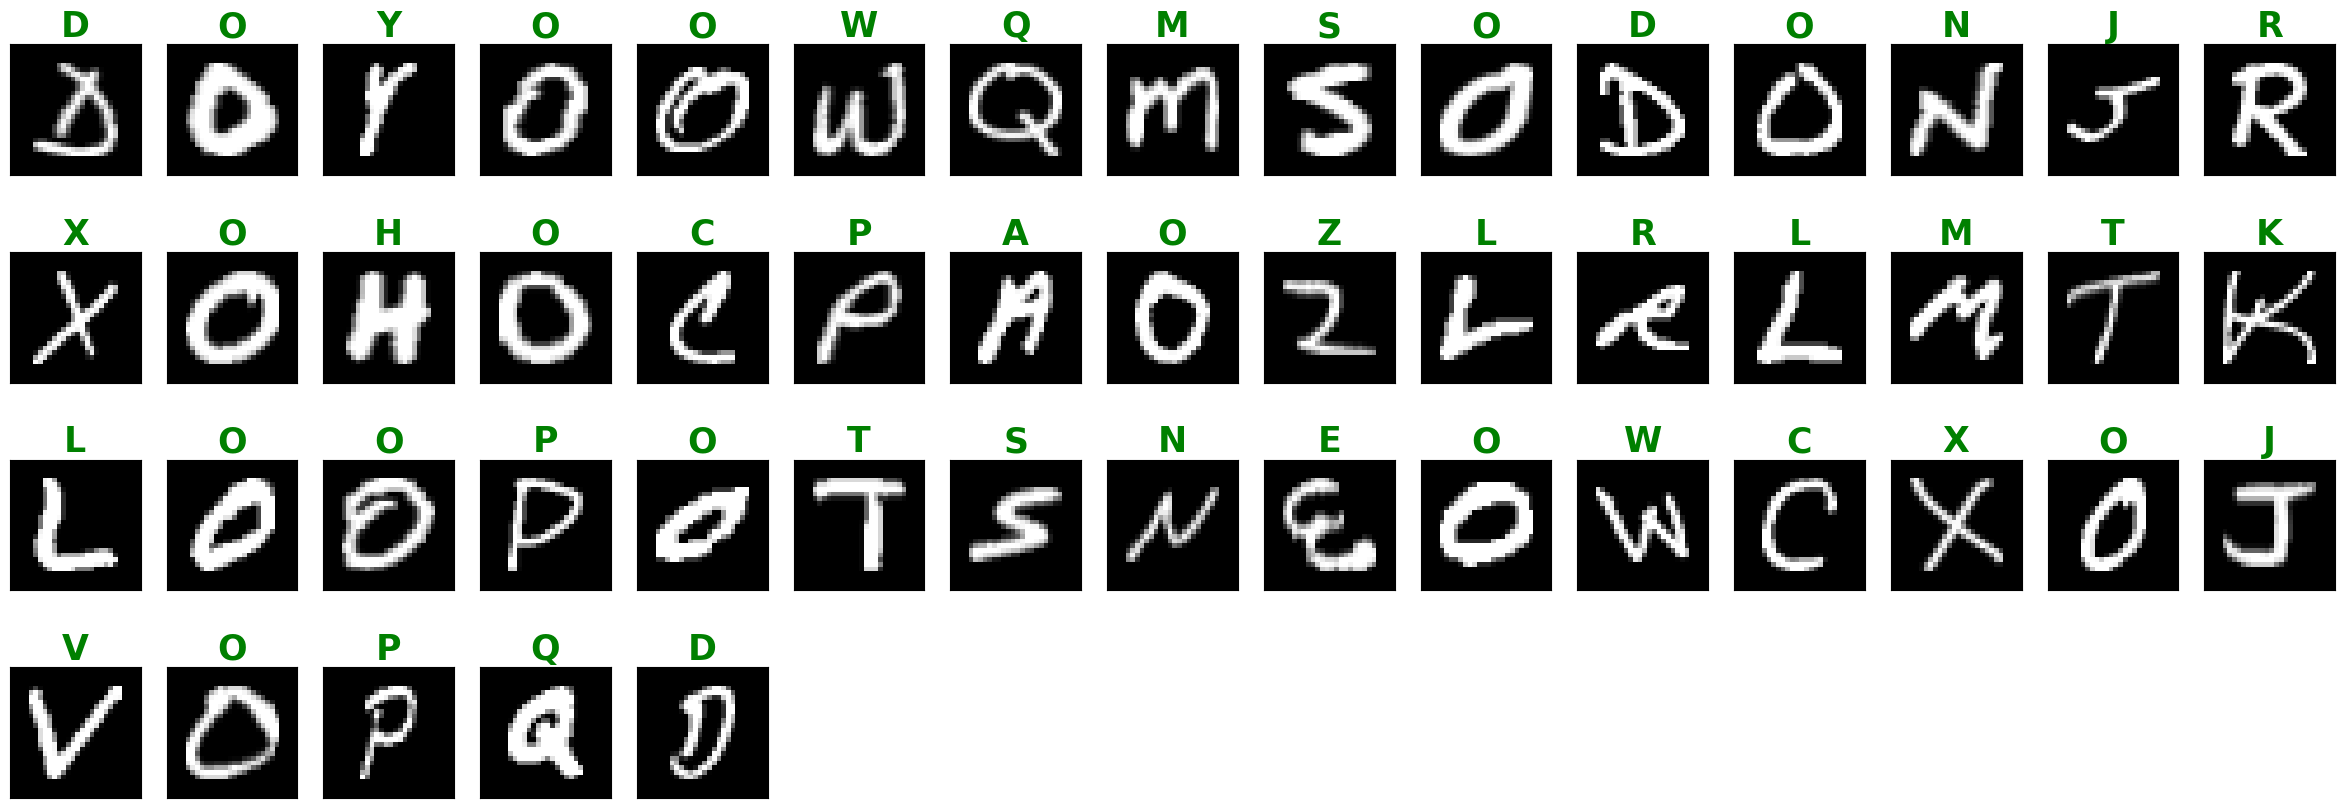

In [22]:
test_images()

# Test your Image

In [23]:
import cv2

In [24]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [41]:
def prepro(img):
    image = cv2.imread(img)
    removed = image.copy()
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Remove vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
    remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(removed, [c], -1, (255,255,255), 15)

    # Remove horizontal lines
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
    remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
    cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    for c in cnts:
        cv2.drawContours(removed, [c], -1, (255,255,255), 5)

    # Repair kernel
    repair_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    removed = 255 - removed
    dilate = cv2.dilate(removed, repair_kernel, iterations=5)
    dilate = cv2.cvtColor(dilate, cv2.COLOR_BGR2GRAY)
    pre_result = cv2.bitwise_and(dilate, thresh)

    result = cv2.morphologyEx(pre_result, cv2.MORPH_CLOSE, repair_kernel, iterations=5)
    final = cv2.bitwise_and(result, thresh)

    invert_final = 255 - final
#     cv2.imwrite('result1.png', invert_final)
    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    blur_image=cv2.medianBlur(invert_final,7)
#     grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)
    plt.title("smoothing",color='red')
    plt.imshow(blur_image, cmap="gray")
    plt.show()

    thresh = cv2.adaptiveThreshold(blur_image,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)
    plt.title("thresholding",color='red')
    plt.imshow(thresh, cmap="gray")
    plt.show()
    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    preprocessed_digits = []

    # initialize the reverse flag and sort index
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                    key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]
        plt.title("contours",color='red')
        plt.imshow(digit, cmap="gray")
        plt.show()
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
#     plt.xticks([])
#     plt.yticks([])
#     plt.title("Contoured Image",color='red')
#     plt.imshow(image, cmap="gray")
#     plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets=[]
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("The Recognized Alphabets are : " ,*alphabets)

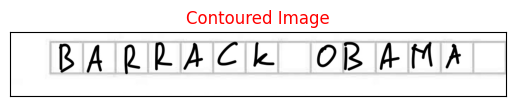

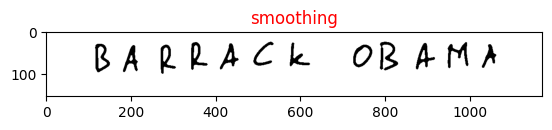

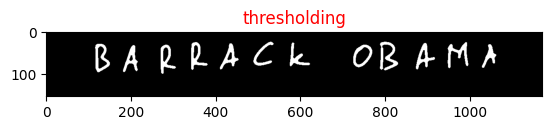

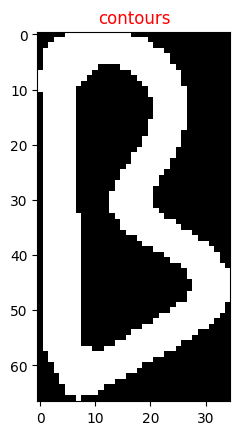

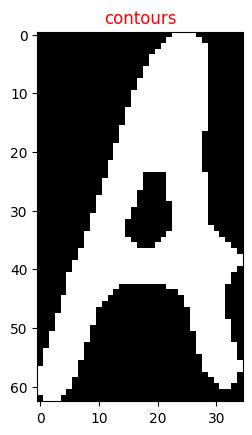

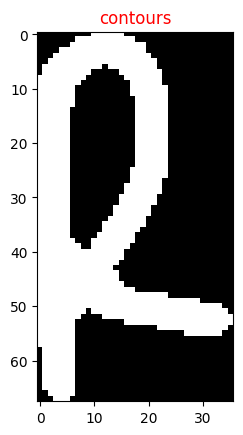

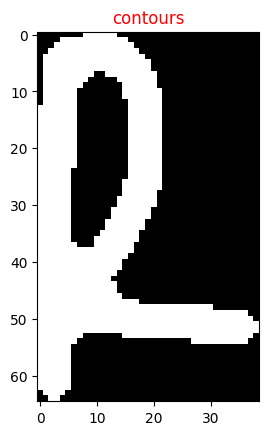

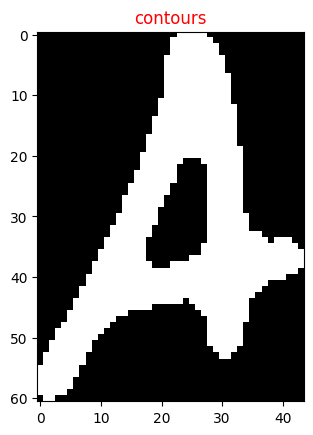

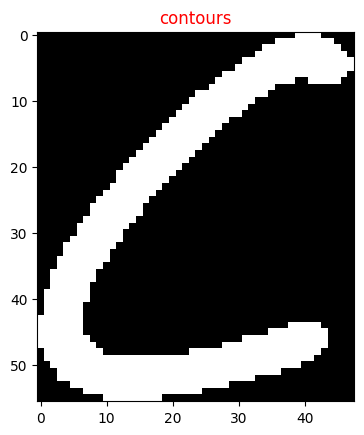

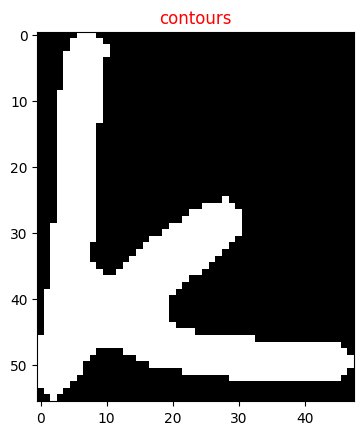

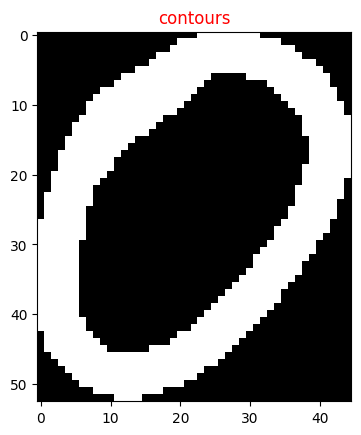

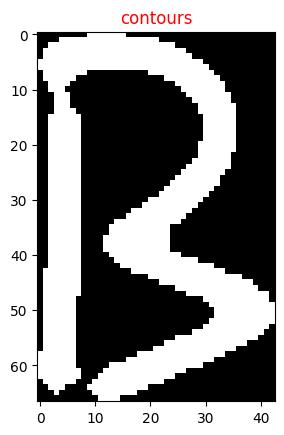

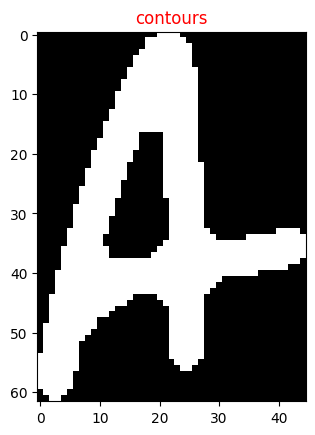

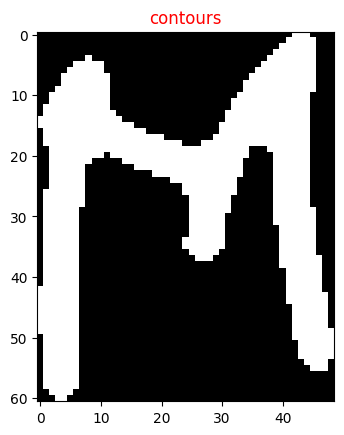

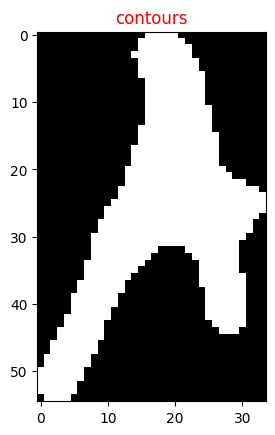

1/1 [==============================] - 0s 25ms/step
The Recognized Alphabets are :  B A R R A C K O B A M A


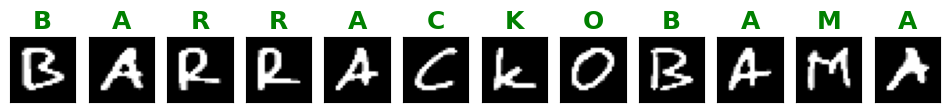

In [42]:
prepro ('/content/gdrive/MyDrive/Training/test1.jpg')

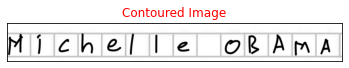

1/1 [==============================] - 0s 8ms/step
The Recognized Alphabets are :  M O S C L C O O C O B A M A


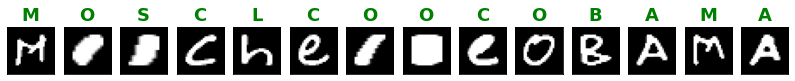

In [ ]:
prepro ('test2.jpg')

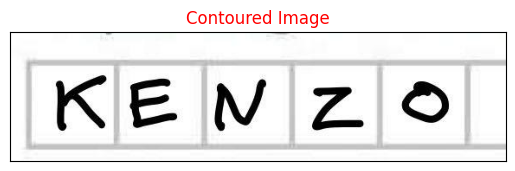

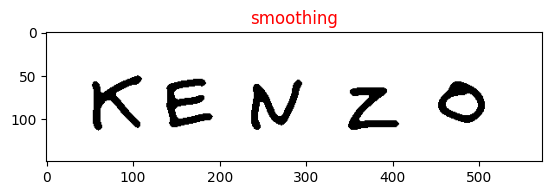

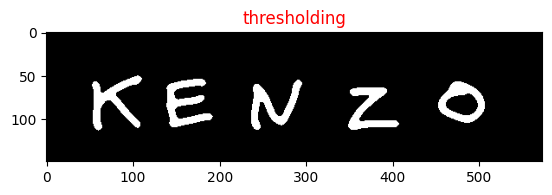

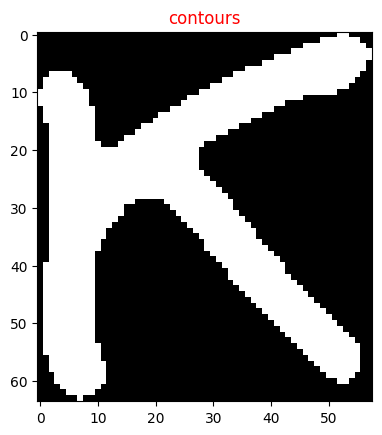

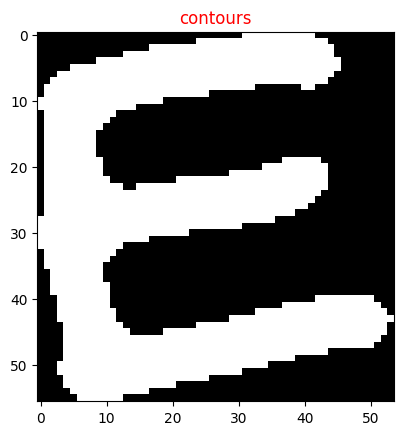

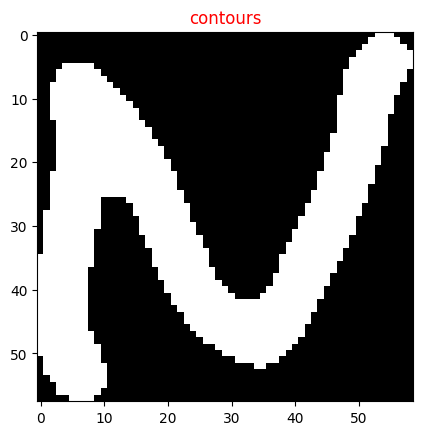

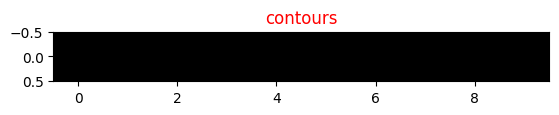

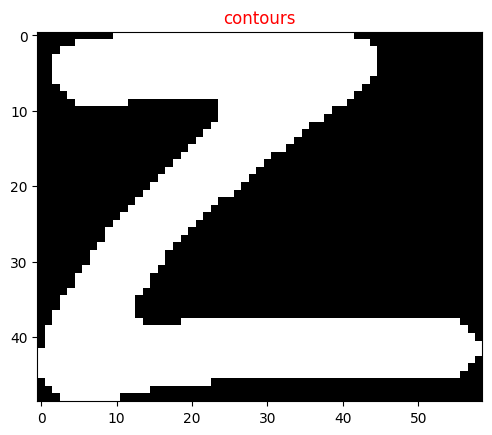

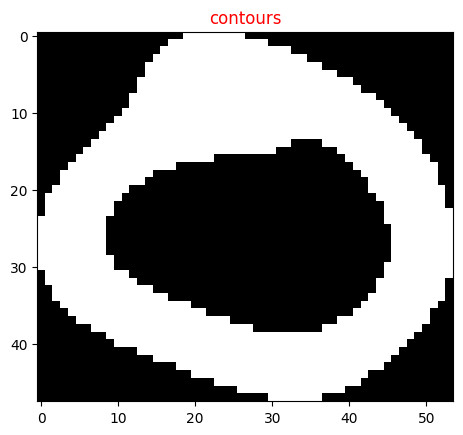

1/1 [==============================] - 0s 24ms/step
The Recognized Alphabets are :  K E N O Z O


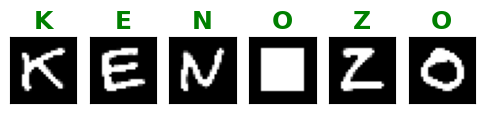

In [43]:
prepro ('/content/gdrive/MyDrive/Training/test3.png')

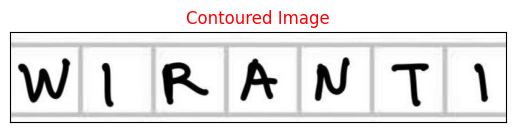

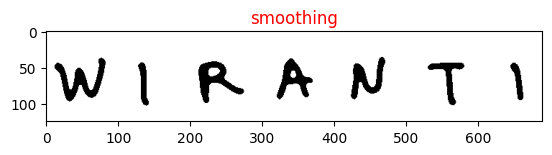

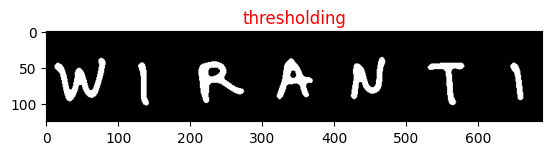

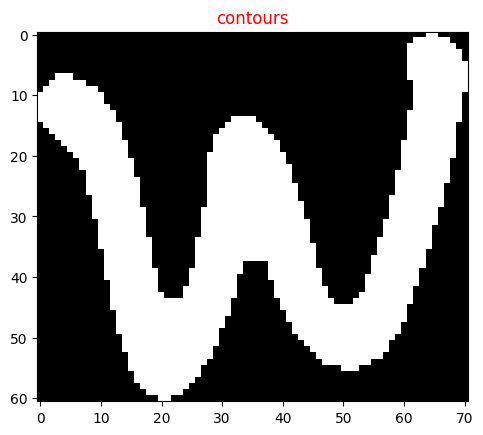

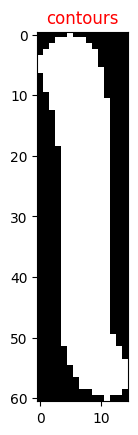

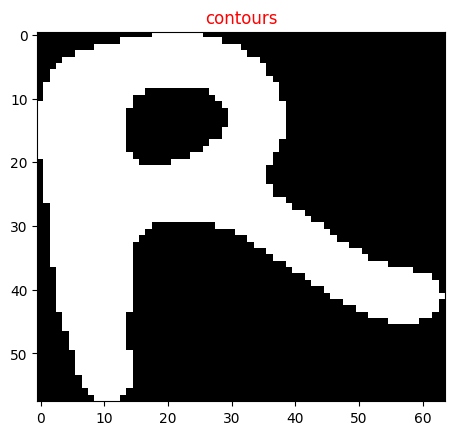

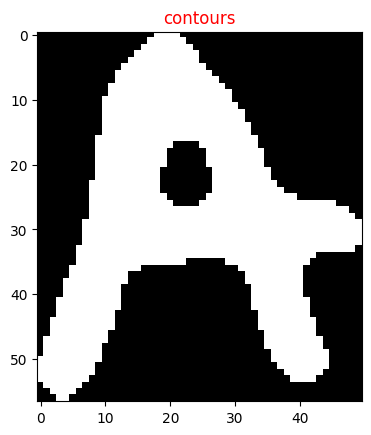

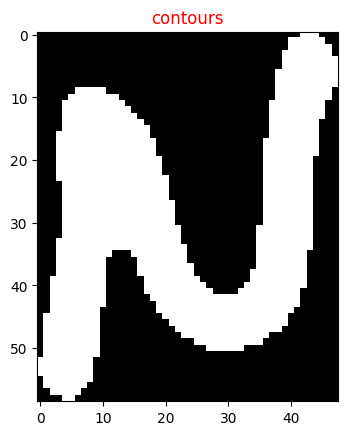

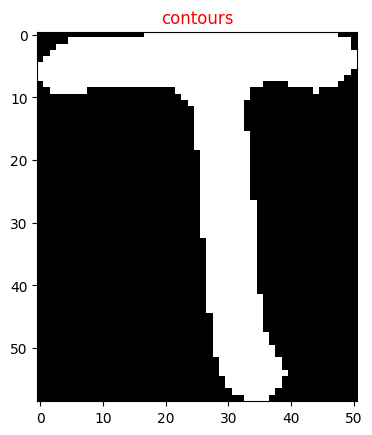

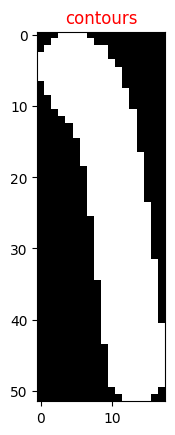

1/1 [==============================] - 0s 88ms/step
The Recognized Alphabets are :  W D R A N T D


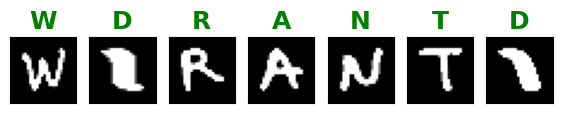

In [44]:
prepro ('/content/gdrive/MyDrive/Training/test4_2.png')

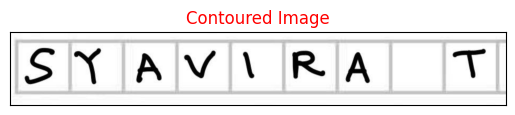

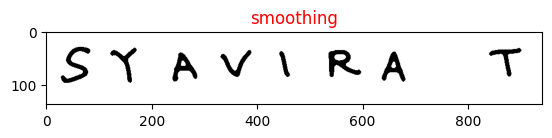

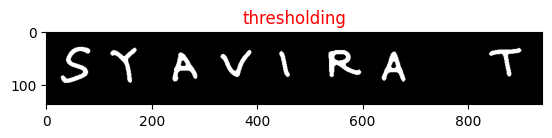

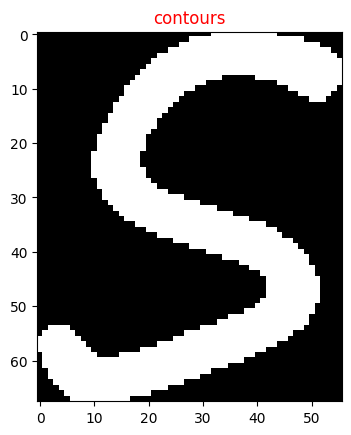

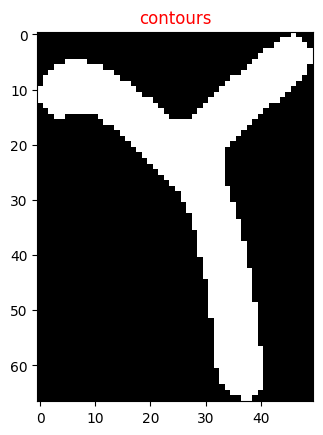

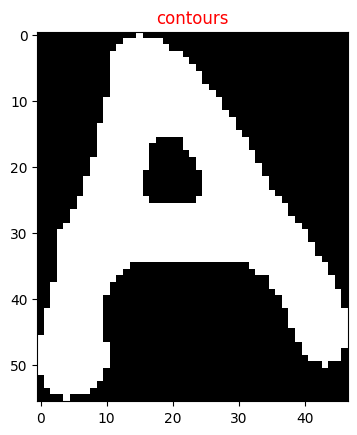

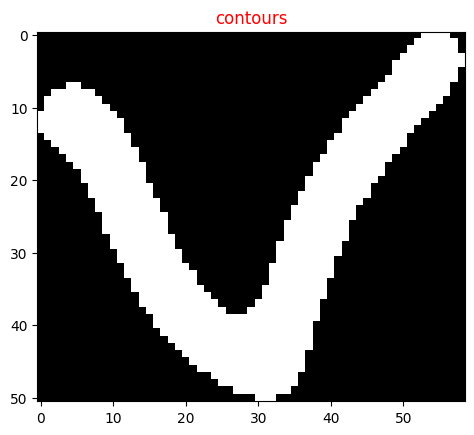

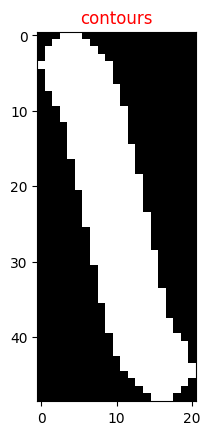

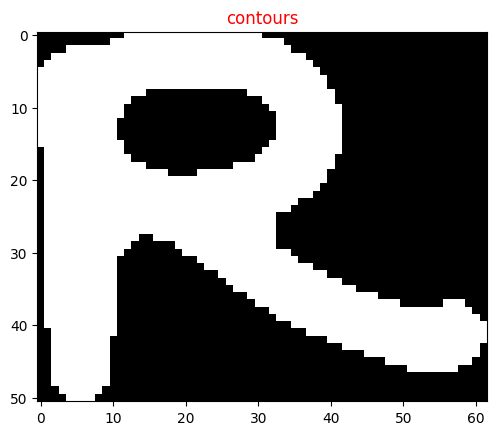

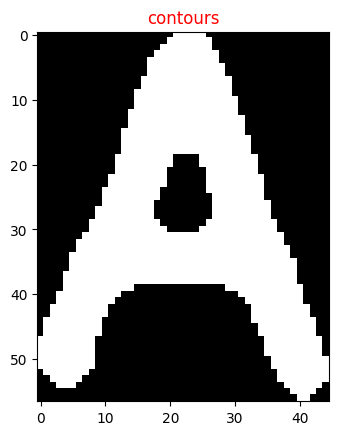

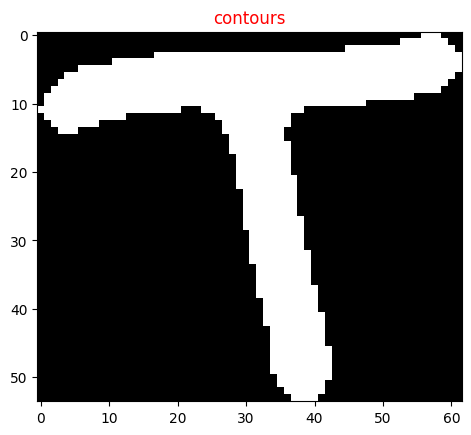

1/1 [==============================] - 0s 37ms/step
The Recognized Alphabets are :  S Y A V D R A T


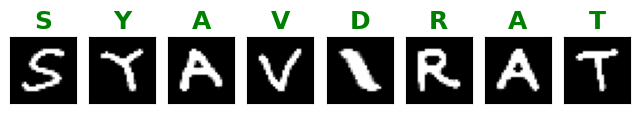

In [45]:
prepro ('/content/gdrive/MyDrive/Training/test5.png')

#### No need to run

In [ ]:
def alphabet_recognize(filepath):
    image = cv2.imread(filepath)
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    # initialize the reverse flag and sort index
    # handle if we need to sort in reverse
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
                                    key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Contoured Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets=[]
    for digit in preprocessed_digits:
        [prediction] = model.predict(digit.reshape(1, 28, 28, 1)/255.)
        pred=alpha[np.argmax(prediction)]
        alphabets.append(pred)
        figr.add_subplot(1,len(inp),i)
        i+=1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(digit.reshape(28, 28), cmap="gray")
        plt.title(pred,color='green',fontsize=18,fontweight="bold")
    print("The Recognized Alphabets are : " ,*alphabets)

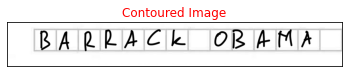

1/1 [==============================] - 0s 10ms/step
The Recognized Alphabets are :  C B U I R I R J A T O B E T A Q M T D D A D D D


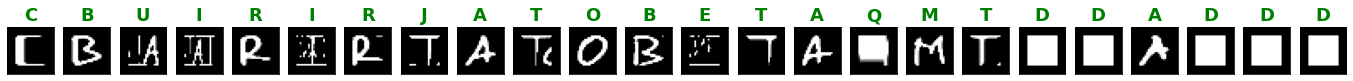

In [ ]:
alphabet_recognize('test1.jpg')

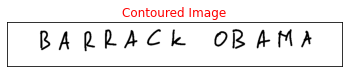

1/1 [==============================] - 0s 9ms/step
The Recognized Alphabets are :  B A R R A C K O B A M A


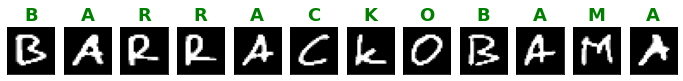

In [ ]:
alphabet_recognize('result1.png')

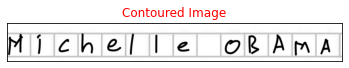

1/1 [==============================] - 0s 9ms/step
The Recognized Alphabets are :  D D M D I C C O U B B A


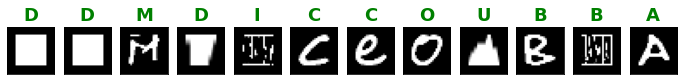

In [ ]:
alphabet_recognize('test2.jpg')

In [ ]:
import cv2

# image = cv2.imread('test1.jpg')
# result = image.copy()
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Remove horizontal lines
# horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
# remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
# cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(result, [c], -1, (255,255,255), 5)

# # Remove vertical lines
# vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
# remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
# cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# for c in cnts:
#     cv2.drawContours(result, [c], -1, (255,255,255), 5)
import cv2

image = cv2.imread('test1.jpg')
removed = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(removed, [c], -1, (255,255,255), 15)

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(removed, [c], -1, (255,255,255), 5)

# Repair kernel
repair_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
removed = 255 - removed
dilate = cv2.dilate(removed, repair_kernel, iterations=5)
dilate = cv2.cvtColor(dilate, cv2.COLOR_BGR2GRAY)
pre_result = cv2.bitwise_and(dilate, thresh)

result = cv2.morphologyEx(pre_result, cv2.MORPH_CLOSE, repair_kernel, iterations=5)
final = cv2.bitwise_and(result, thresh)

invert_final = 255 - final

# cv2.imshow('thresh', thresh)
# cv2.imshow('removed', removed)
# cv2.imshow('dilate', dilate)
# cv2.imshow('pre_result', pre_result)
# cv2.imshow('result', result)
# cv2.imshow('final', final)
# cv2.imshow('invert_final', invert_final)
# cv2.waitKey(1000)

# cv2.imshow('thresh', thresh)
# cv2.imshow('result', result)
cv2.imwrite('result1.png', invert_final)
# cv2.waitKey(1000)
cv2.destroyAllWindows()